In [0]:
# install OpenCV
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16



     |████████████████████████████████| 25.0MB 36.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28
     |████████████████████████████████| 30.6MB 1.9MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [0]:
import cv2 
import os
from google.colab.patches import cv2_imshow
import glob
import numpy.linalg as la
import numpy as np 
import matplotlib.pyplot as plt


**Video Processing**

In [0]:
# code for splitting input video into image frame 
# In our project, we saved the result after face detection/ 
video = cv2.VideoCapture('/content/test_video.mp4')

image_folder = '/content/image/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

status = True
count = 0
while(status):
    status, frame = video.read()
    if(status == False):
        break
    cv2.imwrite(os.path.join(image_folder, str(count)+'.png'), frame)
    count+=1


In [0]:
# code for composing all image frames
img_array = [None] * count
for filename in glob.glob('/content/image/*.png'):
    img = cv2.imread(filename)
    index = int(filename.split("/")[-1].split(".")[0])
    height, width, channels = img.shape
    size = (width,height)
    img_array[index] = img
 
out = cv2.VideoWriter('new4.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])

**SIFT**

In [0]:
def get_descriptor(img):
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    kp,des = sift.compute(gray,kp)
    return kp,des

In [0]:
def countMatch(img1,img2):
  kp1,des1 = get_descriptor(img1)
  kp2,des2 = get_descriptor(img2)
  num = []
  for i in range(len(des1)):
    match =[]
    temp = des1[i]
    for j in range(len(des2)):
      difference = temp-des2[j]
      norm = la.norm(difference,2)
      match.append(norm)
    smallest = min(match)
    match.remove(smallest)
    second_small = min(match)
    val = smallest/second_small
    if val < 0.7:
      num.append(val)
  return len(num)
  

In [0]:
dictionary = {}
different_frames = 0
img_array = [None] * count
location = (500, 25) 
fontScale = 1
font = cv2.FONT_HERSHEY_SIMPLEX 
color = (0, 255, 255) 
thickness = 2
for filename in glob.glob('/content/image/*.png'):
    img = cv2.imread(filename)
    index = int(filename.split("/")[-1].split(".")[0])
    height, width, channels = img.shape
    size = (width,height)
    img_array[index] = img

for i in range(1,count):
   print(i)
   previous = img_array[i-1]
   img = img_array[i]
   match = countMatch(previous,img)
   if(match < 100):
     different_frames +=1
     dictionary[different_frames] = i
   img = cv2.putText(img, str(different_frames), location, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
   img_array[i] = img

In [0]:
previous = img_array[209]
img = img_array[210]
match = countMatch(previous,img)
print(match)

8


**Normalized Histogram Correlation**

In [0]:
dictionary = {}
different_frames = 0
img_array = [None] * count
location = (500, 25) 
fontScale = 1
font = cv2.FONT_HERSHEY_SIMPLEX 
color = (0, 255, 255) 
thickness = 2
for filename in glob.glob('/content/image/*.png'):
    img = cv2.imread(filename)
    index = int(filename.split("/")[-1].split(".")[0])
    height, width, channels = img.shape
    size = (width,height)
    if(index == 0):
      img = cv2.putText(img, str(index), location, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
    img_array[index] = img
 
for i in range(1,count):
   previous = img_array[i-1]
   img = img_array[i]
   hist1 = cv2.calcHist([previous],[0,1,2],None,[256, 256,256],[0,256,0,256,0,256])
   cv2.normalize(hist1, hist1)
   hist2 = cv2.calcHist([img],[0,1,2],None,[256, 256,256],[0,256,0,256,0,256])
   cv2.normalize(hist2, hist2)
   similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
   if(similarity < 0.4):
     different_frames +=1
     dictionary[different_frames] = i
   img = cv2.putText(img, str(different_frames), location, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
   img_array[i] = img


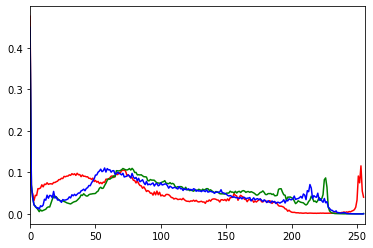

In [0]:
previous = img_array[209]
color_list = ('r','g','b')
plt.figure()
for index,color in enumerate(color_list):
    hist = cv2.calcHist([previous],[index],None,[256],[0,256])
    cv2.normalize(hist, hist)
    plt.plot(hist,color)
    plt.xlim([0,256])
plt.show()


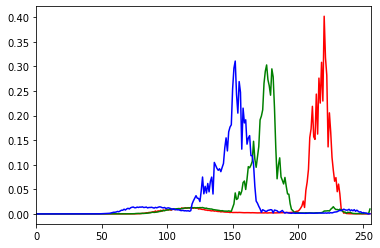

In [0]:
img = img_array[210]
color_list = ('r','g','b')
plt.figure()
for index,color in enumerate(color_list):
    hist = cv2.calcHist([img],[index],None,[256],[0,256])
    cv2.normalize(hist, hist)
    plt.plot(hist,color)
    plt.xlim([0,256])
plt.show()


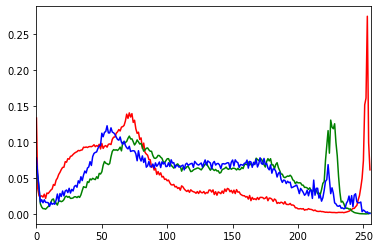

In [0]:
previous = img_array[99]
color_list = ('r','g','b')
plt.figure()
for index,color in enumerate(color_list):
    hist = cv2.calcHist([previous],[index],None,[256],[0,256])
    cv2.normalize(hist, hist)
    plt.plot(hist,color)
    plt.xlim([0,256])
plt.show()


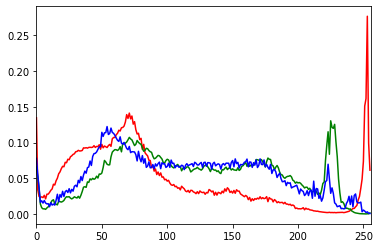

In [0]:
img =img_array[100]
color_list = ('r','g','b')
plt.figure()
for index,color in enumerate(color_list):
    hist = cv2.calcHist([img],[index],None,[256],[0,256])
    cv2.normalize(hist, hist)
    plt.plot(hist,color)
    plt.xlim([0,256])
plt.show()


**Face Detection**

In [0]:
capture = cv2.VideoCapture('test.mp4')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
image_folder = '/content/image/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

count = 0
status = True
font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1
color = (0, 255, 255) 
thickness = 2
while(status):
    status, frame = capture.read()
    if(status == False):
        break
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.2, 3)
    # Display the resulting frame
    for (x,y,w,h) in faces:
         cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        # code for only draw box on face
        #  color_box = img[y:y+h, x:x+w]  
        #  plt.imshow(cv2.cvtColor(color_box, cv2.COLOR_BGR2RGB))

    cv2.imwrite(os.path.join(image_folder, str(count)+'.png'), frame)
    count+=1



In [0]:
img_array = [None] * count
for filename in glob.glob('/content/image/*.png'):
    img = cv2.imread(filename)
    index = int(filename.split("/")[-1].split(".")[0])
    height, width, channels = img.shape
    size = (width,height)
    img_array[index] = img

In [0]:
out = cv2.VideoWriter('qq.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])

**Gender Recognition**

In [0]:
import keras
from keras.models import load_model
from PIL import Image, ImageOps


face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
image_folder = '/content/image/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

count = 0
status = True
font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1
color = (0, 255, 255) 
thickness = 2

# load trained model and reuse it to predict
model = load_model('/content/weights9.16-0.95.h5')

video = cv2.VideoCapture('/content/test_video.mp4')

status = True
count = 0
while(status):
    status, frame = video.read()
    if(status == False):
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # Display the resulting frame
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        # code for only draw box on face
        #  gray_box = gray[y:y+h, x:x+w]
        #  color_box = img[y:y+h, x:x+w]  
        #  plt.imshow(cv2.cvtColor(color_box, cv2.COLOR_BGR2RGB))
        # result = 
        location = (faces[0][0]-5,faces[0][1]-5)
        # ------ code from Mingjie
        # Cut the facial part we need for emotion prediction
        test_img = gray[y:y+h+1,:][:,x:x+w+1]
        # first convert the numpy array to an RGB image,
        # then resize it to 48x48, and convert it back to numpy array
        # in the format required by the trained CNN model
        # for a better resized result
        img = Image.fromarray(test_img,"L")
        size = (48, 48)
        resized_test_gray = ImageOps.fit(img, size, Image.ANTIALIAS)
        resized_test_gray = np.array(resized_test_gray) / 255.0
        test_gray_resized = resized_test_gray.reshape(1, 48, 48, 1)
        # put the face into model and make emotion prediction
        test_pred = np.argmax(model.predict(test_gray_resized))
        # category with highest predicted score will become the output
        label_list = ['woman','man']
        pred = label_list[test_pred]
        # ------ code from Mingjie
        # predicted emotion as a string will be printed above the frame
        frame = cv2.putText(frame, pred, location, font,  
                fontScale, color, thickness, cv2.LINE_AA) 

    cv2.imwrite(os.path.join(image_folder, str(count)+'.png'), frame)
    count+=1


In [0]:
img_array = [None] * count
for filename in glob.glob('/content/image/*.png'):
    img = cv2.imread(filename)
    index = int(filename.split("/")[-1].split(".")[0])
    height, width, channels = img.shape
    size = (width,height)
    img_array[index] = img

In [0]:
out = cv2.VideoWriter('qq.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])

In [0]:
import keras
from keras.models import load_model
from PIL import Image, ImageOps

Using TensorFlow backend.


**Gender recognition for specific image**

In [0]:
import keras
from keras.models import load_model
from PIL import Image, ImageOps

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
image_folder = '/content/image/'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

model = load_model('/content/weights9.16-0.95.h5')
frame = cv2.imread('/content/test.jpg')

font = cv2.FONT_HERSHEY_SIMPLEX 
fontScale = 1
color = (0, 255, 255) 
thickness = 2

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.25, 3)
count = 0
# Display the resulting frame
for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    # code for only draw box on face
    #  gray_box = gray[y:y+h, x:x+w]
    #  color_box = img[y:y+h, x:x+w]  
    #  plt.imshow(cv2.cvtColor(color_box, cv2.COLOR_BGR2RGB))
    # result = 
    location = (faces[0][0]-5,faces[0][1]-5)
    # ------ code from Mingjie
    # Cut the facial part we need for emotion prediction
    test_img = gray[y:y+h+1,:][:,x:x+w+1]
    # first convert the numpy array to an RGB image,
    # then resize it to 48x48, and convert it back to numpy array
    # in the format required by the trained CNN model
    # for a better resized result
    img = Image.fromarray(test_img,"L")
    size = (48, 48)
    resized_test_gray = ImageOps.fit(img, size, Image.ANTIALIAS)
    resized_test_gray = np.array(resized_test_gray) / 255.0
    test_gray_resized = resized_test_gray.reshape(1, 48, 48, 1)
    # put the face into model and make emotion prediction
    test_pred = np.argmax(model.predict(test_gray_resized))
    # category with highest predicted score will become the output
    label_list = ['woman','man']
    pred = label_list[test_pred]
    # ------ code from Mingjie
    # predicted emotion as a string will be printed above the frame
    frame = cv2.putText(frame, pred, location, font,  
            fontScale, color, thickness, cv2.LINE_AA) 

cv2.imwrite(os.path.join(image_folder, str(count)+'.png'), frame)
count+=1